### EDA_Totales Dial-BAf.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Totales de accesos dial-up y Banda Ancha Fija (BAf)."**, proporcionando 
información sobre la evolución y distribución de estos accesos en el país.

### Objetivo del Análisis
El propósito de este análisis es **comparar la evolución del acceso a internet mediante dial-up y Banda Ancha Fija**, 
determinando tendencias y relevancia actual de cada tecnología.

In [1]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Totales Dial-BAf.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               42 non-null     int64 
 1   Trimestre         42 non-null     int64 
 2   Banda ancha fija  42 non-null     int64 
 3   Dial up           42 non-null     int64 
 4   Total             42 non-null     int64 
 5   Periodo           42 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.1+ KB
None


In [3]:
# Convertir la columna "Año" a tipo int
df['Año'] = pd.to_datetime(df['Año']).dt.year
print("La columna 'Año' ha sido convertida a tipo int.")
print(df.dtypes)

La columna 'Año' ha sido convertida a tipo int.
Año                  int32
Trimestre            int64
Banda ancha fija     int64
Dial up              int64
Total                int64
Periodo             object
dtype: object


In [4]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Año', 'Trimestre', 'Banda ancha fija', 'Dial up', 'Total', 'Periodo']


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               42 non-null     int32 
 1   Trimestre         42 non-null     int64 
 2   Banda ancha fija  42 non-null     int64 
 3   Dial up           42 non-null     int64 
 4   Total             42 non-null     int64 
 5   Periodo           42 non-null     object
dtypes: int32(1), int64(4), object(1)
memory usage: 1.9+ KB
None


In [6]:
print(df.head())

    Año  Trimestre  Banda ancha fija  Dial up     Total        Periodo
0  1970          2          11544314    11793  11556107   Abr-Jun 2024
1  1970          1          11621363    11793  11633156   Ene-Mar 2024
2  1970          4          11535868    11793  11547661   Oct-Dic 2023
3  1970          3          11395115    11793  11406908  Jul-Sept 2023
4  1970          2          11239781    12116  11251897   Abr-Jun 2023


In [7]:
import sweetviz as sv
from skimpy import skim

c:\Program Files\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               42 non-null     int32 
 1   Trimestre         42 non-null     int64 
 2   Banda ancha fija  42 non-null     int64 
 3   Dial up           42 non-null     int64 
 4   Total             42 non-null     int64 
 5   Periodo           42 non-null     object
dtypes: int32(1), int64(4), object(1)
memory usage: 1.9+ KB
None
    Año  Trimestre  Banda ancha fija  Dial up     Total        Periodo
0  1970          2          11544314    11793  11556107   Abr-Jun 2024
1  1970          1          11621363    11793  11633156   Ene-Mar 2024
2  1970          4          11535868    11793  11547661   Oct-Dic 2023
3  1970          3          11395115    11793  11406908  Jul-Sept 2023
4  1970          2          11239781    12116  11251897   Abr-Jun 2023


In [9]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 42     │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA ┃ NA % ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Año           │  0 │    0 │    1970 │       0 │    1970 │    1970 │    1970 │     1970 │     1970 │     ▇  │  │
│ │ Trimestre     │  0 │    0 │   2.452 │   1.131 │       1 │    1.25 │       2 │        3 │        4 │ ▇ ▇ ▇▇ │  │
│ │ Banda ancha   │  0 │    0 │ 8794000 │ 1742000 │ 6362000 │ 7190000 │ 8705000 │ 10380000 │ 11620000 │ ▇▃▃▃▂▆ │  │
│ │ fija          │    │      │         │         │         │         │         │          │          │        │  │
│ │ Dial up       │  0 │    0 │   21490 │   10140 │    9991 │   11790 │   21800 │    28590 │    39320 │ ▇ ▂▃▂▂ │  │
│ │ Total         │  0 │    0 │ 8816000 │ 1733000 │ 6398000 │ 7218000 │ 8721000 │ 10390000 │ 11630000 │ ▇▅▃▅▂▆ │  │
│ └───────────────┴────┴──────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃         ┃    ┃      ┃           ┃           ┃            ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column  ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min        ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Periodo │  0 │    0 │ Abr-Jun   │ Jul-Sept  │ Abr-Jun    │ Oct-Dic   │       12.2 │         2 │         84 │  │
│ │         │    │      │ 2024      │ 2023      │ 2014       │ 2023      │            │           │            │  │
│ └─────────┴────┴──────┴───────────┴───────────┴────────────┴───────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [10]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               42 non-null     int32 
 1   Trimestre         42 non-null     int64 
 2   Banda ancha fija  42 non-null     int64 
 3   Dial up           42 non-null     int64 
 4   Total             42 non-null     int64 
 5   Periodo           42 non-null     object
dtypes: int32(1), int64(4), object(1)
memory usage: 1.9+ KB
None



Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
           Año  Trimestre  Banda ancha fija       Dial up         Total  \
count     42.0  42.000000      4.200000e+01     42.000000  4.200000e+01   
unique     NaN        NaN               NaN           NaN           NaN   
top        NaN        NaN               NaN           NaN           NaN   
freq       NaN        NaN               NaN           NaN           NaN   
mean    1970.0   2.452381      8.794433e+06  21490.190476  8.815923e+06   
std        0.0   1.130560      1.742229e+06  10136.781243  1.733189e+06   
min     1970.0   1.000000      6.362108e+06   9991.000000  6.398398e+06   
25%     1970.0   1.250000      7.189537e+06  11793.000000  7.218131e+06   
50%     1970.0   2.000000      8.704688e+06  21802.500000  8.720658e+06   
75%     1970.0   3.000000      1.037650e+07  28593.750000  1.038873e+07   
max     1970.0   4.000000      1.162136e+07  39324.000000  1.163316e+07   

             Periodo  
co

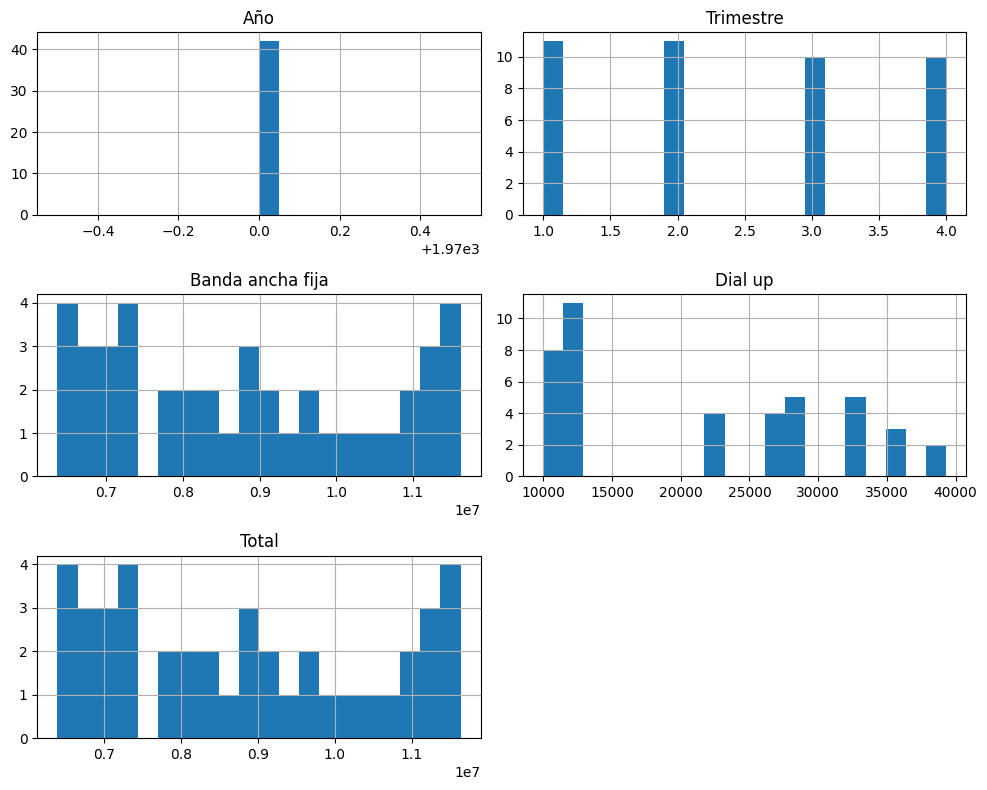

In [11]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
                  Año  Trimestre  Banda ancha fija   Dial up     Total
Año               NaN        NaN               NaN       NaN       NaN
Trimestre         NaN   1.000000          0.024918 -0.035652  0.024840
Banda ancha fija  NaN   0.024918          1.000000 -0.892453  0.999997
Dial up           NaN  -0.035652         -0.892453  1.000000 -0.891260
Total             NaN   0.024840          0.999997 -0.891260  1.000000


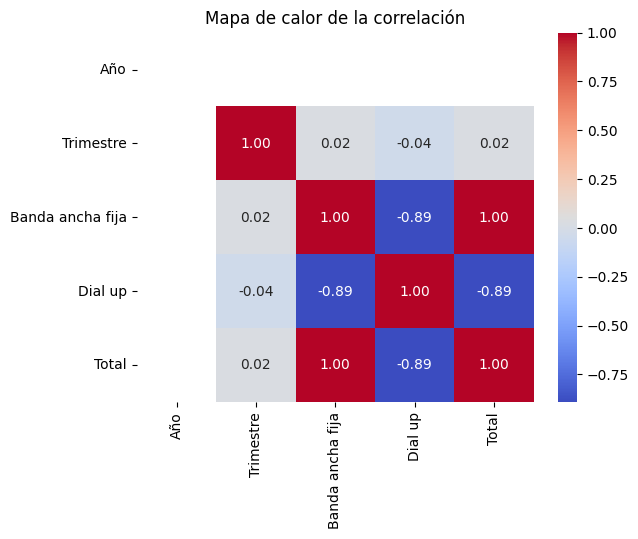

In [12]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [13]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


In [15]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
    Año  Trimestre  Banda ancha fija   Dial up     Total
0   NaN  -0.404989          1.597502 -0.968230  1.600172
1   NaN  -1.300229          1.642262 -0.968230  1.645166
2   NaN   1.385490          1.592595 -0.968230  1.595240
3   NaN   0.490250          1.510827 -0.968230  1.513045
4   NaN  -0.404989          1.420588 -0.935980  1.422524
5   NaN  -1.300229          1.414592 -0.904029  1.416683
6   NaN   1.385490          1.394961 -0.903030  1.396956
7   NaN   0.490250          1.327005 -0.903929  1.328640
8   NaN  -0.404989          1.250065 -0.904029  1.251298
9   NaN  -1.300229          1.055534 -0.885757  1.055859
10  NaN   1.385490          0.977423 -0.861594  0.977482
11  NaN   0.490250          0.744033 -1.111610  0.741413
12  NaN  -0.404989          0.614786 -1.109113  0.611506
13  NaN  -1.300229          0.490032 -1.145657  0.485888
14  NaN   1.385490          0.445643 -1.145657  0.441267
15  NaN   0.490250          0.320531 -1.145657  0.3

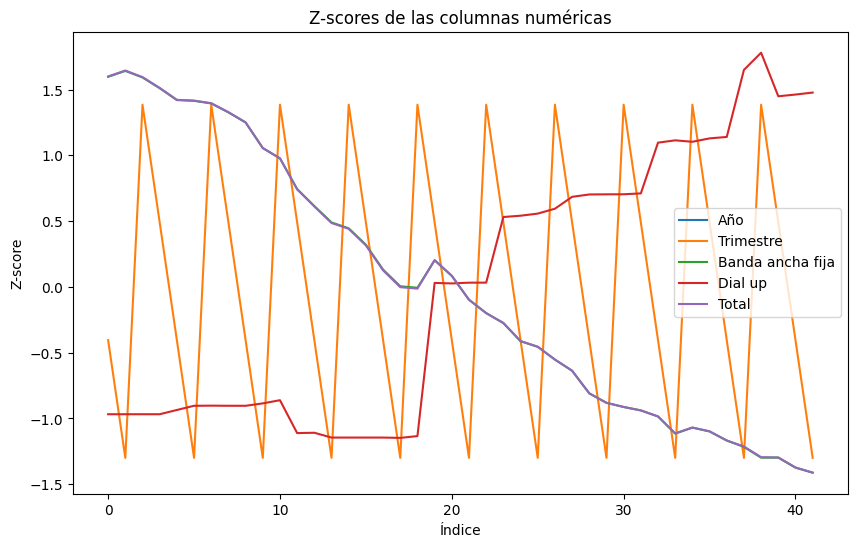

In [16]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [17]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Periodo':
Periodo
Abr-Jun 2024     1
Ene-Mar 2024     1
Oct-Dic 2023     1
Jul-Sept 2023    1
Abr-Jun 2023     1
Ene-Mar 2023     1
Oct-Dic 2022     1
Jul-Sept 2022    1
Abr-Jun 2022     1
Ene-Mar 2022     1
Oct-Dic 2021     1
Jul-Sept 2021    1
Abr-Jun 2021     1
Ene-Mar 2021     1
Oct-Dic 2020     1
Jul-Sept 2020    1
Abr-Jun 2020     1
Ene-Mar 2020     1
Oct-Dic 2019     1
Jul-Sept 2019    1
Abr-Jun 2019     1
Ene-Mar 2019     1
Oct-Dic 2018     1
Jul-Sept 2018    1
Abr-Jun 2018     1
Ene-Mar 2018     1
Oct-Dic 2017     1
Jul-Sept 2017    1
Abr-Jun 2017     1
Ene-Mar 2017     1
Oct-Dic 2016     1
Jul-Sept 2016    1
Abr-Jun 2016     1
Ene-Mar 2016     1
Oct-Dic 2015     1
Jul-Sept 2015    1
Abr-Jun 2015     1
Ene-Mar 2015     1
Oct-Dic 2014     1
Jul-Sept 2014    1
Abr-Jun 2014     1
Ene-Mar 2014     1
Name: count, dtype: int64


In [18]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


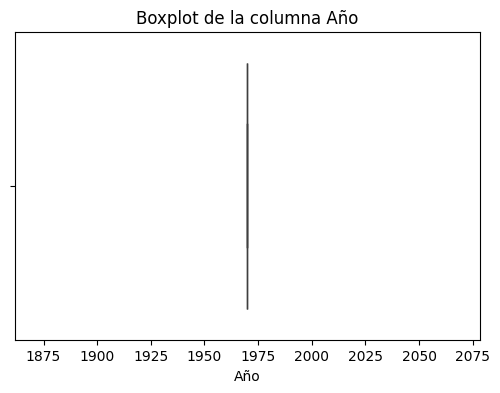

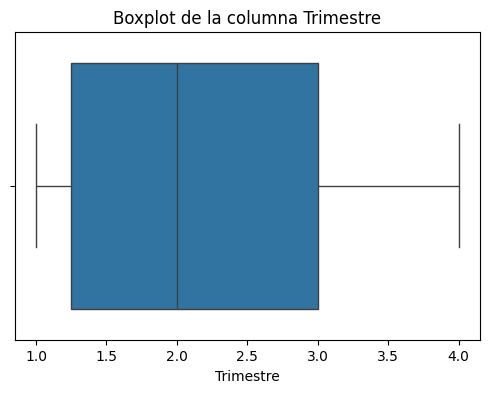

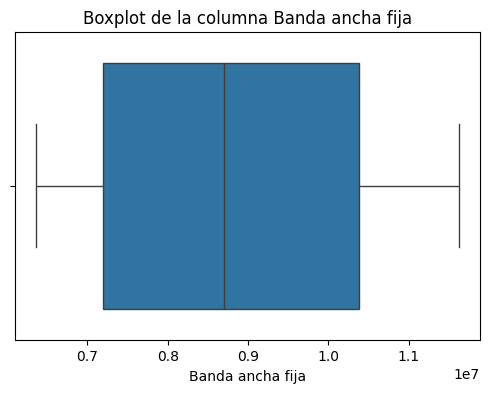

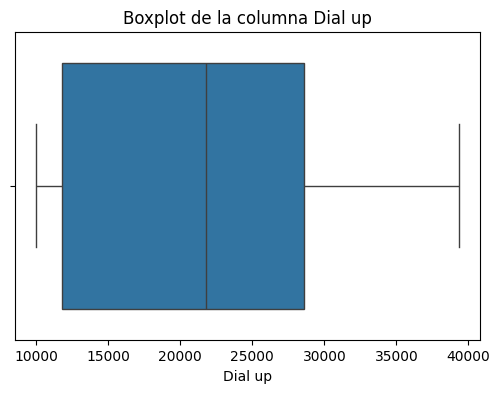

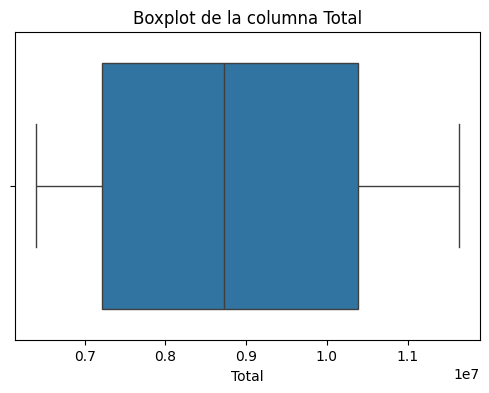

In [19]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [20]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64


In [21]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Totales Dial-BAf.csv


In [22]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Año                 0.000000
Trimestre           0.070729
Banda ancha fija    0.251490
Dial up             0.209069
Total               0.256071
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Año                 0.000000
Trimestre          -1.371727
Banda ancha fija   -1.323499
Dial up            -1.562835
Total              -1.319854
dtype: float64


In [23]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
           Variable         VIF
0               Año  254.317564
1         Trimestre    1.001507
2  Banda ancha fija         inf
3           Dial up         inf
4             Total         inf


c:\Program Files\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


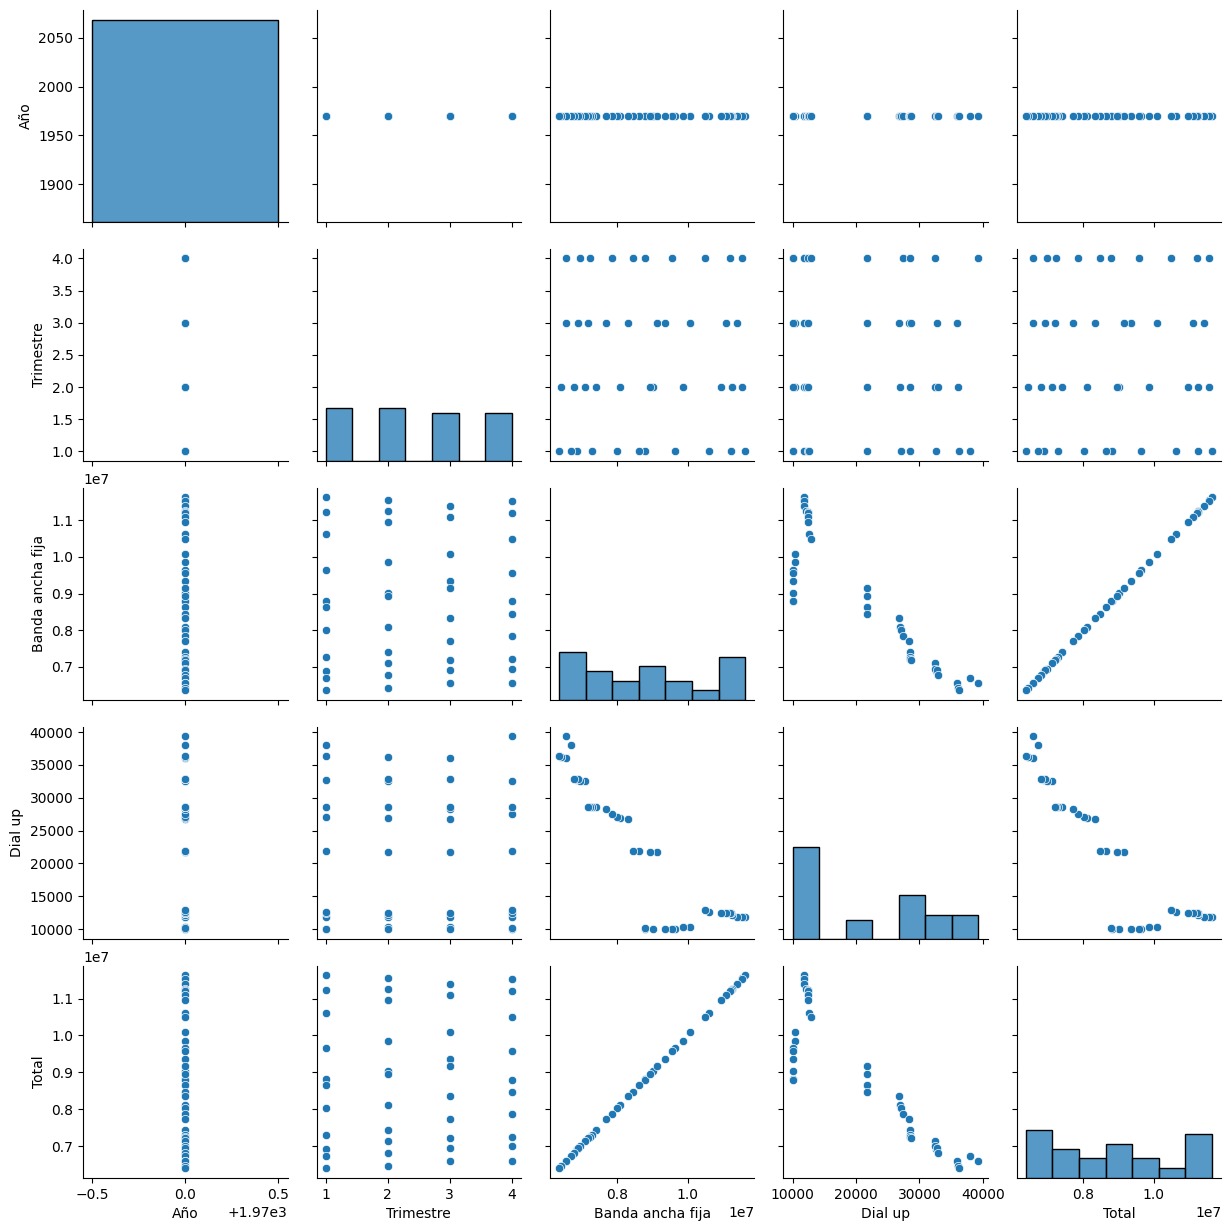

In [24]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [25]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Periodo':
                Año                                                      \
              count    mean std     min     25%     50%     75%     max   
Periodo                                                                   
Abr-Jun 2014    1.0  1970.0 NaN  1970.0  1970.0  1970.0  1970.0  1970.0   
Abr-Jun 2015    1.0  1970.0 NaN  1970.0  1970.0  1970.0  1970.0  1970.0   
Abr-Jun 2016    1.0  1970.0 NaN  1970.0  1970.0  1970.0  1970.0  1970.0   
Abr-Jun 2017    1.0  1970.0 NaN  1970.0  1970.0  1970.0  1970.0  1970.0   
Abr-Jun 2018    1.0  1970.0 NaN  1970.0  1970.0  1970.0  1970.0  1970.0   
Abr-Jun 2019    1.0  1970.0 NaN  1970.0  1970.0  1970.0  1970.0  1970.0   
Abr-Jun 2020    1.0  1970.0 NaN  1970.0  1970.0  1970.0  1970.0  1970.0   
Abr-Jun 2021    1.0  1970.0 NaN  1970.0  1970.0  1970.0  1970.0  1970.0   
Abr-Jun 2022    1.0  1970.0 NaN  1970.0  1970.0  1970.0  1970.0  1970.0   
Abr-Jun 2023    1.0  1970.0 NaN  1970.0  1970.0  1970.0  1970.

In [26]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Periodo':
                  Año  Trimestre  Banda ancha fija  Dial up       Total
Periodo                                                                
Abr-Jun 2014   1970.0        2.0         6428329.0  36139.0   6464468.0
Abr-Jun 2015   1970.0        2.0         6783279.0  32909.0   6816188.0
Abr-Jun 2016   1970.0        2.0         7097604.0  32475.0   7130079.0
Abr-Jun 2017   1970.0        2.0         7401134.0  28530.0   7429664.0
Abr-Jun 2018   1970.0        2.0         8083533.0  26911.0   8110444.0
Abr-Jun 2019   1970.0        2.0         8938427.0  21754.0   8960181.0
Abr-Jun 2020   1970.0        2.0         9021040.0  10016.0   9031056.0
Abr-Jun 2021   1970.0        2.0         9852702.0  10382.0   9863084.0
Abr-Jun 2022   1970.0        2.0        10946248.0  12436.0  10958684.0
Abr-Jun 2023   1970.0        2.0        11239781.0  12116.0  11251897.0
Abr-Jun 2024   1970.0        2.0        11544314.0  11793.0  11556107.0
Ene-Mar 2014   1970.0     

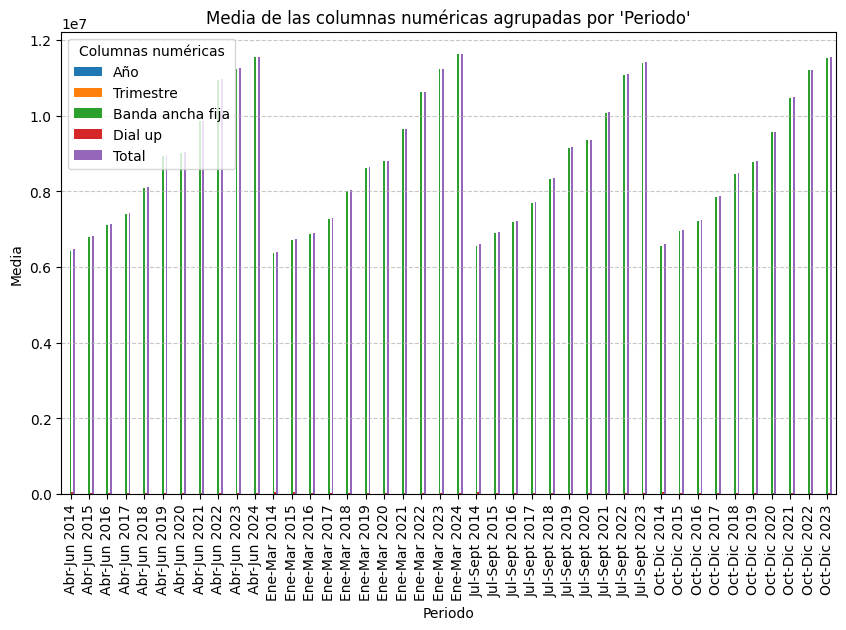

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


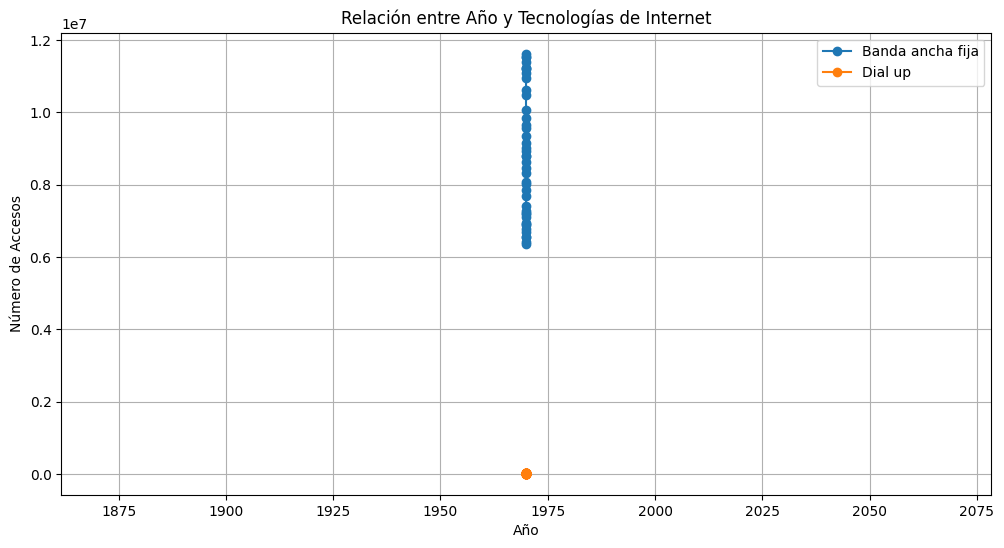

In [28]:
plt.figure(figsize=(12, 6))

# Graficar Banda ancha fija
plt.plot(df['Año'], df['Banda ancha fija'], label='Banda ancha fija', marker='o')

# Graficar Dial up
plt.plot(df['Año'], df['Dial up'], label='Dial up', marker='o')

plt.title('Relación entre Año y Tecnologías de Internet')
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.legend()
plt.grid(True)
plt.show()

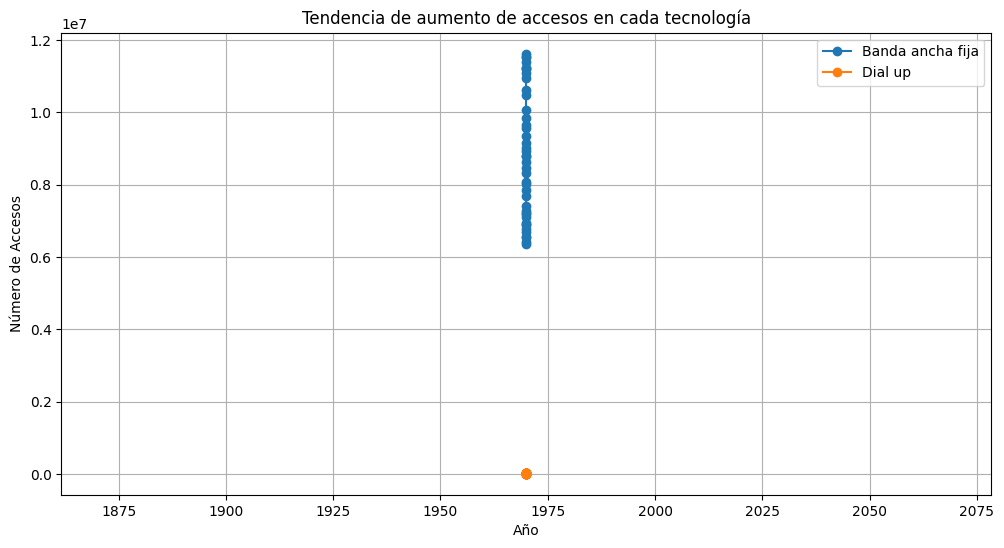

In [29]:
plt.figure(figsize=(12, 6))

# Graficar Banda ancha fija
plt.plot(df['Año'], df['Banda ancha fija'], label='Banda ancha fija', marker='o')

# Graficar Dial up
plt.plot(df['Año'], df['Dial up'], label='Dial up', marker='o')

plt.title('Tendencia de aumento de accesos en cada tecnología')
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.legend()
plt.grid(True)
plt.show()

# Análisis Exploratorio de Datos (EDA) - Totales Dial-BAf

## Introducción

Este proyecto realiza un análisis exploratorio de datos (EDA) sobre el conjunto de datos proporcionado por el **Ente Nacional de Comunicaciones (ENACOM)** de Argentina. El análisis se centra en la hoja de datos **"Totales de accesos dial-up y Banda Ancha Fija (BAf)"**, proporcionando información sobre la evolución y distribución de estos accesos en el país.

## Objetivo del Análisis

El propósito de este análisis es **comparar la evolución del acceso a internet mediante dial-up y Banda Ancha Fija**, determinando tendencias y relevancia actual de cada tecnología.

## Contenido del Notebook

1. **Carga y Normalización de Datos**
    - Importación de librerías necesarias.
    - Carga del archivo CSV y verificación de su existencia.
    - Conversión de la columna "Año" a tipo entero.
    - Extracción y visualización de los nombres de las columnas.

2. **Verificación y Limpieza de Datos**
    - Información básica del DataFrame.
    - Visualización de las primeras filas del DataFrame.
    - Resumen del DataFrame utilizando `skimpy`.

3. **Análisis Estadístico y Exploratorio**
    - Estadísticas descriptivas para columnas numéricas y categóricas.
    - Histogramas de las columnas numéricas.
    - Cálculo y visualización de la matriz de correlación.
    - Análisis de tablas de contingencia para columnas categóricas.
    - Cálculo de Z-scores para columnas numéricas y su visualización.

4. **Análisis de Valores Atípicos y Nulos**
    - Identificación de columnas con valores negativos.
    - Visualización de valores atípicos mediante gráficos de caja.
    - Conteo de valores nulos por columna.

5. **Análisis de Distribuciones y Multicolinealidad**
    - Cálculo de skewness y kurtosis para columnas numéricas.
    - Verificación de multicolinealidad utilizando el Factor de Inflación de la Varianza (VIF).

6. **Visualización de Relaciones y Agrupamiento**
    - Visualización de la relación entre variables numéricas mediante `pairplot`.
    - Agrupamiento de datos por categorías y cálculo de estadísticas por grupo.
    - Verificación de duplicados en el DataFrame.

7. **Visualización de Tendencias**
    - Gráficos de líneas para visualizar la evolución de las tecnologías de internet a lo largo de los años.

## Requisitos

- Python 3.x
- Librerías: pandas, numpy, matplotlib, seaborn, sweetviz, skimpy, scipy, statsmodels

## Uso

1. Clona este repositorio en tu máquina local.
2. Asegúrate de tener instaladas todas las librerías necesarias.
3. Ejecuta el Jupyter Notebook para reproducir el análisis.

## Contribuciones

Las contribuciones son bienvenidas. Si deseas mejorar este análisis, por favor abre un issue o envía un pull request.

## Licencia

Este proyecto está bajo la Licencia MIT. Consulta el archivo `LICENSE` para más detalles.